# Exercise 1 :Tweets Clustering
- Using narendra modi's tweets data , identify minimum and maximum date from created_at column
- Create word cloud using all the rows from text column
- Clean the text column
 - Convert all characters to lower case
 - Apply regular expressions to retain only alphabets,# , @ and spaces
 - Remove stop words
 - Apply Stemming
- Creating the document Term Matrix using CountVectorizer; Set min_df=5
- Using KMeans algorithm , cluster the tweets in to 4 groups.
- Create wordcloud for each group.

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
!pip install wordcloud

[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Access Denied>
[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Access Denied>
[nltk_data] Error loading vader_lexicon: <urlopen error Tunnel
[nltk_data]     connection failed: 407 Proxy Access Denied>


You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
tweets = pd.read_csv("C:/Users/Administrator/UNSTRUCTURE DATA/datasets/narendramodi_tweets.csv")
tweets.head(10)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
5,8.263826e+17,659.0,0.0,2017-01-31 10:52:09,RT @PMOIndia: Financial inclusion for poverty ...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
6,8.263824e+17,498.0,0.0,2017-01-31 10:51:25,RT @RashtrapatiBhvn: The four-decade old deman...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
7,8.263823e+17,508.0,0.0,2017-01-31 10:51:18,RT @RashtrapatiBhvn: My Government has taken b...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
8,8.263823e+17,460.0,0.0,2017-01-31 10:51:08,"RT @RashtrapatiBhvn: Under its proactive ""Act ...",en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
9,8.263822e+17,389.0,0.0,2017-01-31 10:50:55,RT @RashtrapatiBhvn: Through Stand-up India in...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [3]:
docs = tweets['text'].str.lower().str.replace('[^a-z@# ]','')  #retain text(a-z) and ignore everything else.
stemmer = nltk.stem.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

In [4]:
docs_clean = []
for doc in docs.head(2):
    words = doc.split(" ")
    print(doc)
    print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean=' '.join(words_clean)
    docs_clean.append(doc_clean)
    #print(words_clean)
    #print('-----------------------')
print(docs_clean)

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
['presid address wonder encapsul india strength aspir potenti amp effort toward #transformingindia', 'rashtrapati ji address hous parliament indepth amp extens hear httpstcordkqtjgnnx @rashtrapatibhvn']


In [5]:
docs =tweets['text'].str.lower().str.replace('[^a-z @#]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2       rt @pmoindia empow marginalis httpstcowwsqgwdk
3    rt @pmoindia commit welfar farmer httpstcopaaf...
4    rt @pmoindia improv qualiti life poor httpstco...
Name: text, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean) 
dtm

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [7]:
df_dtm = pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm.head(10)

,aadhaar,abeshinzo,abhiyan,absolut,access,accomplish,account,achiev,across,act,...,year,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngster,youth,zay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(df_dtm)

labels = kmeans.predict(df_dtm)

centroids = kmeans.cluster_centers_



In [9]:
tweets['clean'] = docs_clean


In [10]:
tweets['pred_cluster'] = labels

In [11]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,clean,pred_cluster
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,presid address wonder encapsul india strength ...,1
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,rashtrapati ji address hous parliament indepth...,1
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,rt @pmoindia empow marginalis httpstcowwsqgwdk,3
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,rt @pmoindia commit welfar farmer httpstcopaaf...,3
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,rt @pmoindia improv qualiti life poor httpstco...,3


In [13]:
g1= tweets[tweets['pred_cluster']==0]
g2= tweets[tweets['pred_cluster']==1]
g3= tweets[tweets['pred_cluster']==2]
g4= tweets[tweets['pred_cluster']==3]


In [14]:
!pip install wordcloud

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


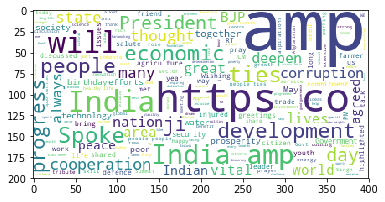

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
input_string = ' '.join(g1['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

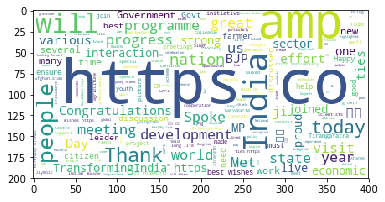

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
input_string = ' '.join(g2['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

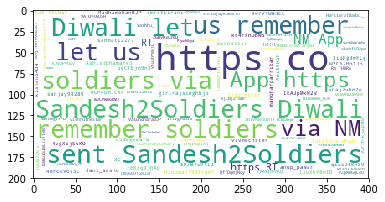

In [18]:

input_string = ' '.join(g3['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

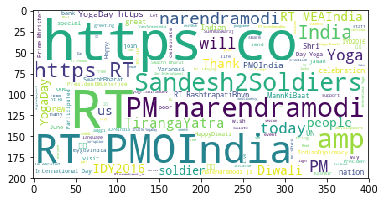

In [19]:
input_string = ' '.join(g4['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)